In [7]:
from __future__  import print_function, division
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
import zipfile
%matplotlib inline

# Null Hypothesis:

# The ratio of man biking at morning (5 am to 12 am) over man biking the whole day  is the same or higher than the ratio of woman biking at morning over woman biking the whole day

# _$H_0$_ : $\frac{W_{\mathrm{morning}}}{W_{\mathrm{day}}} <= \frac{M_{\mathrm{morning}}}{M_{\mathrm{day}}}$
# _$H_1$_ : $\frac{W_{\mathrm{morning}}}{W_{\mathrm{day}}} > \frac{M_{\mathrm{morning}}}{M_{\mathrm{day}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I'm using the data of citibike in 201706

In [28]:
zipFile =zipfile.ZipFile("/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip")

In [29]:
zipFile.extractall(path=(os.getenv('PUIDATA')+'/citibike/'))

In [31]:
data = pd.read_csv(os.getenv('PUIDATA')+'/citibike/201706-citibike-tripdata.csv')

In [36]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [37]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [44]:
data = data[['gender','starttime']]

In [45]:
data.head()

,gender,starttime
0,1,2017-06-01 00:00:02
1,1,2017-06-01 00:00:13
2,1,2017-06-01 00:00:20
3,2,2017-06-01 00:00:24
4,1,2017-06-01 00:00:33


In [56]:
data= data.rename(columns={'starttime':'date'})
data['date'] = pd.to_datetime(data['date'])
data.head()

,gender,date
0,1,2017-06-01 00:00:02
1,1,2017-06-01 00:00:13
2,1,2017-06-01 00:00:20
3,2,2017-06-01 00:00:24
4,1,2017-06-01 00:00:33


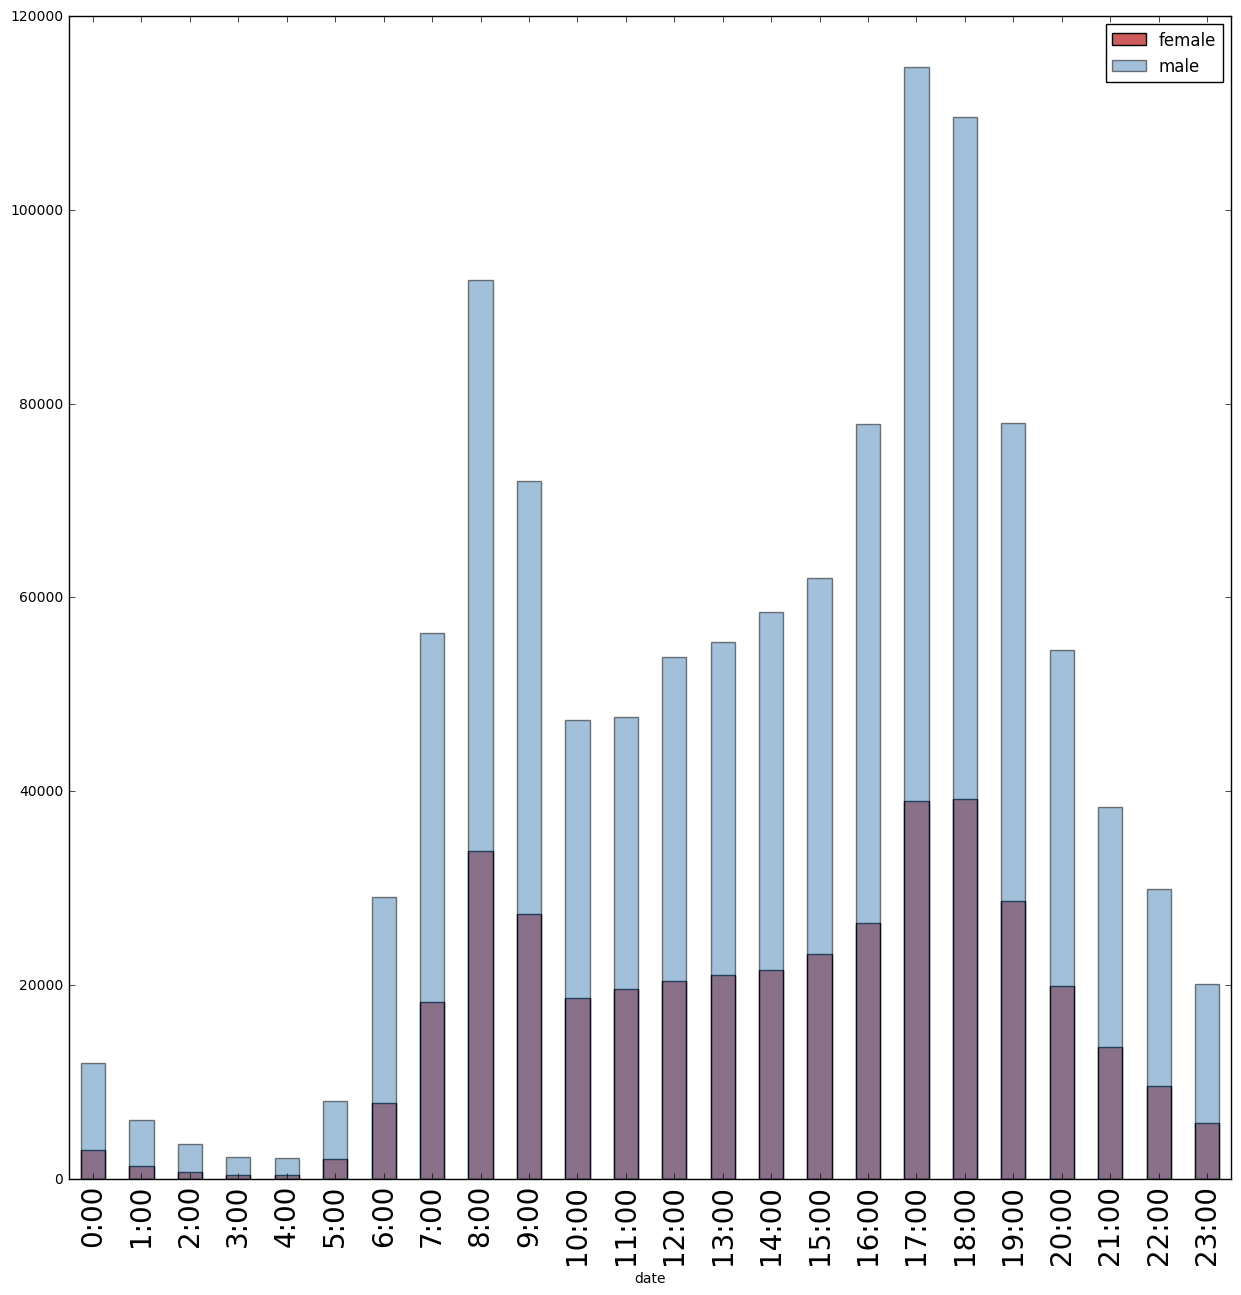

In [60]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((data['date'][data['gender'] == 2].groupby([data['date'].dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((data['date'][data['gender'] == 1].groupby([data['date'].dt.hour]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=20)
pl.legend()

## Figure 1: Distribution of Citibike bikers' starttime by gender in June 2017, absolute counts

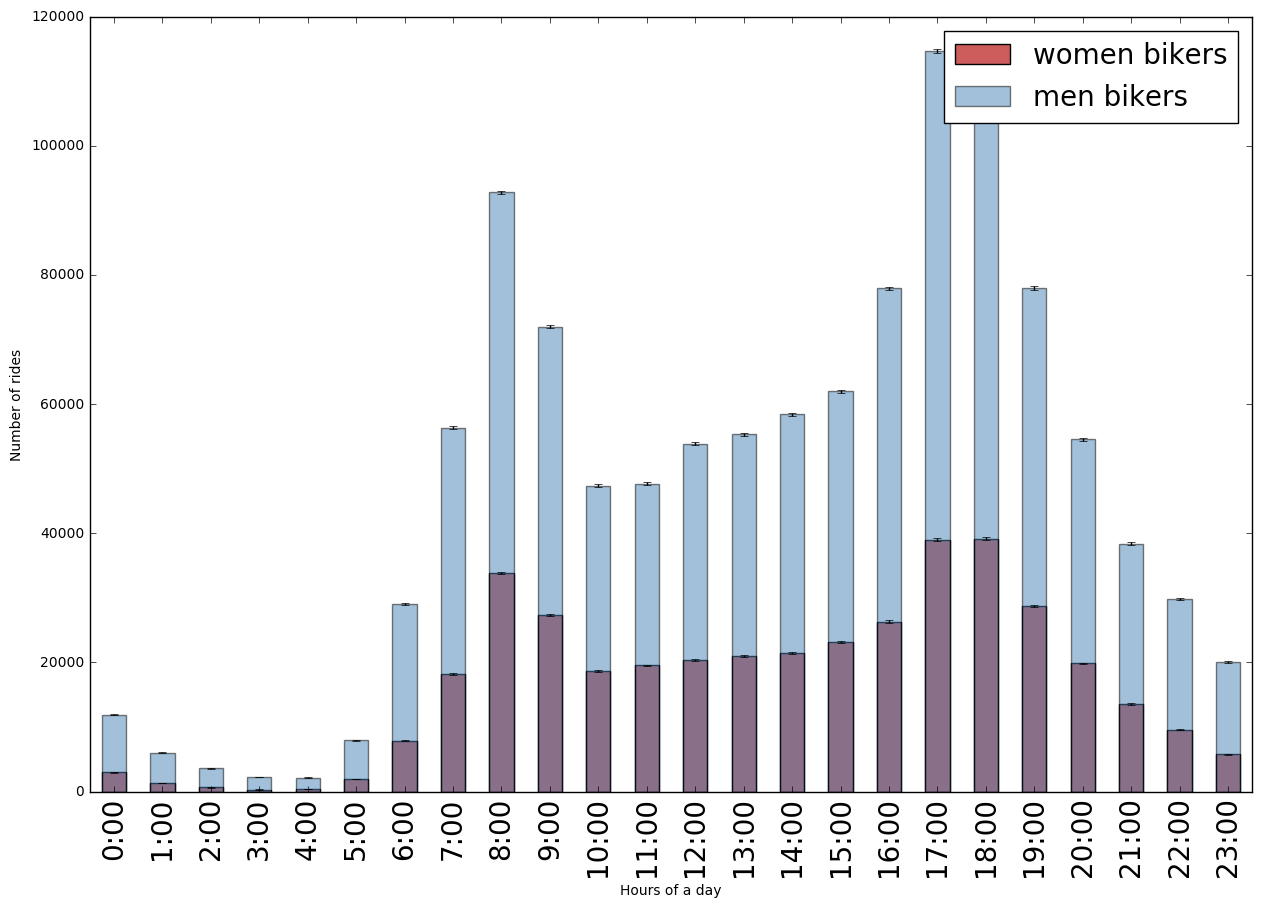

In [65]:
fig=pl.figure(figsize(15,10))

counts_w = data.date[data.gender == 2].groupby([data.date.dt.hour]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = data.date[data.gender==1].groupby([data.date.dt.hour]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Hours of a day")
pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 2: Distribution of Citibike bikers' starttime by gender in June 2017, absolute counts, with statistical errors

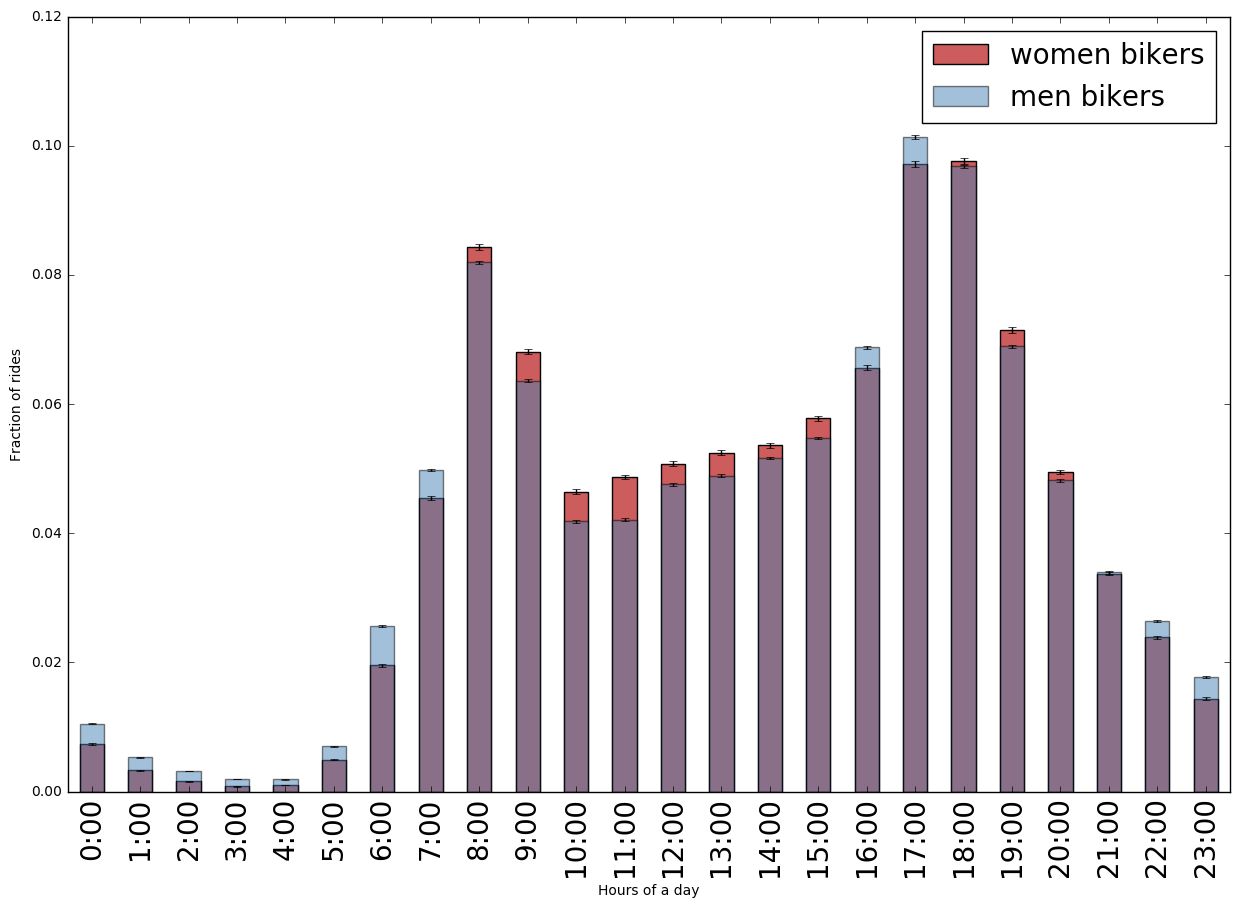

In [66]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00',\
                               '18:00','19:00','20:00','21:00','22:00','23:00'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Hours of a day")

pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 3: Distribution of Citibike bikers' starttime by gender in June 2017, normalized

In [73]:
w_morning = counts_w.loc[5:12].sum()
p_w = w_morning/norm_w

In [74]:
m_morning = counts_m.loc[5:12].sum()
p_m = m_morning/norm_m

In [75]:
print(p_m,p_w)

0.359593791135 0.368420921464
